<a href="https://colab.research.google.com/github/ShipengLYU/Gazefollwing/blob/main/GazeFollowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#挂载Google drive 空间
https://github.com/svip-lab/GazeFollowing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


删除无用数据

In [2]:
!rm -rf /content/sample_data
# !rm -rf /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata

#临时查看网络

In [ ]:
import scipy.io as scio
 
dataFile = '/content/drive/MyDrive/gazetracking-method2/GazeFollowing/train_annotations.mat'
data = scio.loadmat(dataFile)


In [ ]:
import random
# print(len(data))
# print(data['train_bbox'][0,0][0])
# print(data['train_eyes'][0,1])
print(data['train_gaze'][0,0].mean(axis=0))
print(data['train_gaze'][0,0])
# print(data['train_meta'][0])
# print(data['train_path'][0][0])
print((224 // 4, 224 // 4))


[0.51090909 0.31132813]
[[0.51090909 0.31132813]]
(56, 56)


In [ ]:
import numpy as np
height, width = 224, 224
x_grid = np.array(range(width)).reshape([1, width]).repeat(height, axis=0)
print(x_grid)
y_grid = np.array(range(height)).reshape([height, 1]).repeat(width, axis=1)
print(y_grid)
grid = np.stack((x_grid, y_grid)).astype(np.float32)
print('############################################################')
print(grid.shape)
x=0.45*224
y=0.43*224
print('############################################################')
d=np.array([x, y]).reshape([2, 1, 1]).astype(np.float32)
print(d)
print('############################################################')
grid -= np.array([x, y]).reshape([2, 1, 1]).astype(np.float32)
print('############################################################')
norm = np.sqrt(np.sum(grid ** 2, axis=0)).reshape([1, height, width])
print(norm.shape)
print('############################################################')

[[  0   1   2 ... 221 222 223]
 [  0   1   2 ... 221 222 223]
 [  0   1   2 ... 221 222 223]
 ...
 [  0   1   2 ... 221 222 223]
 [  0   1   2 ... 221 222 223]
 [  0   1   2 ... 221 222 223]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [221 221 221 ... 221 221 221]
 [222 222 222 ... 222 222 222]
 [223 223 223 ... 223 223 223]]
############################################################
(2, 224, 224)
############################################################
[[[100.8 ]]

 [[ 96.32]]]
############################################################
############################################################
(1, 224, 224)
############################################################


#训练网络

导入数据集并解压

In [ ]:

# !mkdir /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata
# %cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata 
# %pwd
# !jar xvf /content/drive/MyDrive/gazetracking-method2/data_new.zip
# # !rm -rf /content/data_new


# Testing on gazefollow data

In [ ]:
import sys
%cd /content/
%pwd
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing')
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata/data_new/test2')
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing/code')

/content


In [ ]:
!cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code && python test_gazefollow.py

/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata/data_new/test_annotations.mat contains 4782 images
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:00<00:00, 257MB/s]
test_gazefollow.py:169: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  map(lambda x: Variable(x.cuda(), volatile=True), [image, face_image, gaze_field, eye_position, gt_position, gt_heatmap])
loss: 0.03312, 0.00000, 0.03312
loss: 0.05240, 0.01538, 0.06778
loss: 0.05235, 0.03445, 0.08679
loss: 0.08382, 0.00735, 0.09117
loss: 0.03649, 0.05134, 0.08783
loss: 0.05980, 0.00548, 0.06528
loss: 0.05612, 0.02041, 0.07653
loss: 0.10024, 1.57460, 1.67484
loss: 0.07629, 0.00083, 0.07713
loss: 0.06364, 0.04083, 0.10447
loss: 0.03430, 0.00461, 0.03892
loss: 0.04803, 0.05399, 0.10202
loss: 0.04368, 0.00052, 0.04420
loss: 0.12336, 0.02110, 0.14446
loss: 0.05139, 0.000

# Evaluation metrics

In [ ]:
%cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code
!python cal_min_dis.py
!python cal_auc.py

/content/drive/MyDrive/gazetracking-method2/GazeFollowing/code
(4782, 2)
Min Dist and Min Angle:
[0.08121414 8.84841073]
(4782, 56, 56)
mean 0.9143814749182347
auc score
0.9065580728668008


In [ ]:

!cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code && python test_gazefollow.py

/content
/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata/data_new/test_annotations.mat contains 4782 images
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:00<00:00, 302MB/s]
test_gazefollow.py:169: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  map(lambda x: Variable(x.cuda(), volatile=True), [image, face_image, gaze_field, eye_position, gt_position, gt_heatmap])
loss: 0.03312, 0.00000, 0.03312
loss: 0.05240, 0.01538, 0.06778
loss: 0.05235, 0.03445, 0.08679
loss: 0.08382, 0.00735, 0.09117
loss: 0.03649, 0.05134, 0.08783
loss: 0.05980, 0.00548, 0.06528
loss: 0.05612, 0.02041, 0.07653
loss: 0.10024, 1.57460, 1.67484
loss: 0.07629, 0.00083, 0.07713
loss: 0.06364, 0.04083, 0.10447
loss: 0.03430, 0.00461, 0.03892
loss: 0.04803, 0.05399, 0.10202
loss: 0.04368, 0.00052, 0.04420
loss: 0.12336, 0.02110, 0.14446
loss: 0.051

#Upload our image

## detect the eyes position

In [ ]:
!pip install mediapipe
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.4 MB/s 


In [ ]:
DESIRED_HEIGHT = 720
DESIRED_WIDTH = 1280
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

path= '/content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/3.jpg'
image=cv2.imread(path)
resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

# help(mp_face_detection.FaceDetection)

In [ ]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

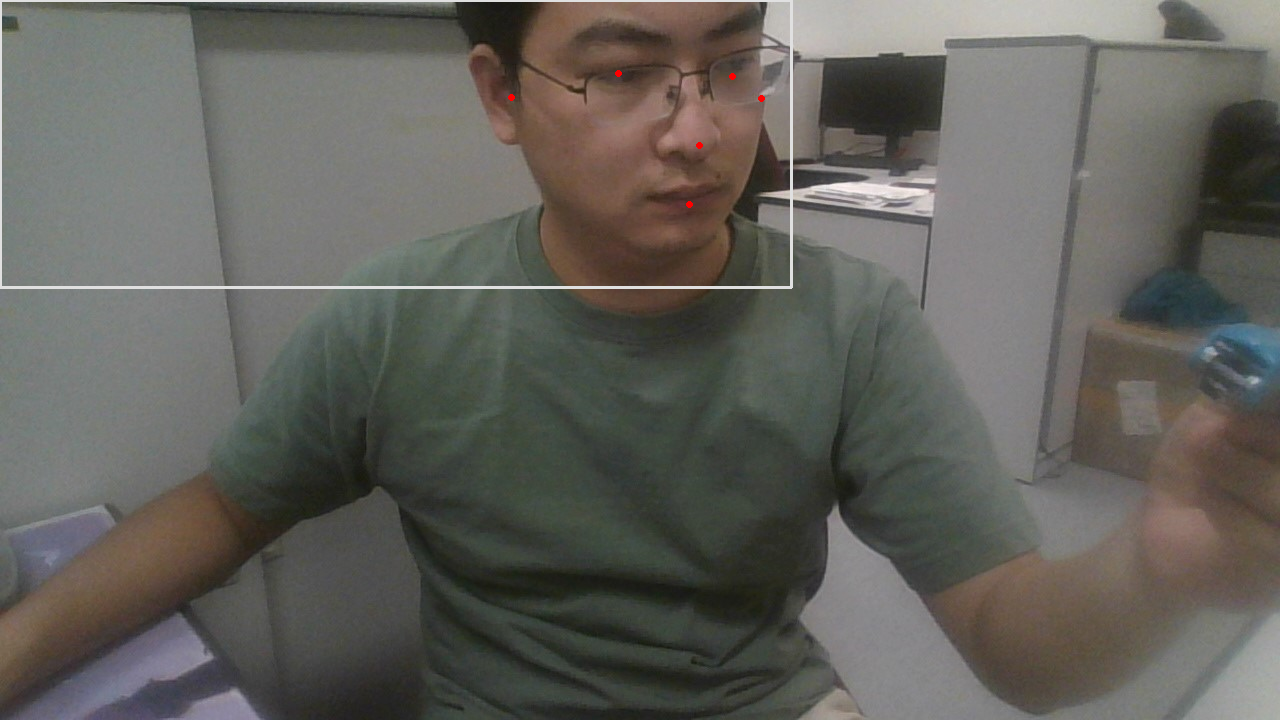

In [ ]:
# Run MediaPipe Face Detection with short range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  # for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # print(results.detections)
    # Draw face detections of each face.
    # print(f'Face detections of {name}:')
    # if not results.detections:
    #   break
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)



In [ ]:
e_x=(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE).x+mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.LEFT_EYE).x)/2
e_y=(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE).y+mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.LEFT_EYE).y)/2
print(e_x)
print(e_y)

0.6234869956970215
0.17815032601356506


In [ ]:

!python /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code/inference.py /content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/2.jpg 0.62 0.18
# !python /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code/inference.py /content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/00000003.jpg 0.52 0.14

0.9464285714285714 0.5535714285714286
